In [2]:
import pandas as pd

from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt


In [3]:
bodyfat = pd.read_csv("bodyfat-reduced.csv")
print(bodyfat)

     BodyFat  Weight  Chest  Abdomen    Hip  Thigh  Biceps
0       12.3  154.25   93.1     85.2   94.5   59.0    32.0
1        6.1  173.25   93.6     83.0   98.7   58.7    30.5
2       25.3  154.00   95.8     87.9   99.2   59.6    28.8
3       10.4  184.75  101.8     86.4  101.2   60.1    32.4
4       28.7  184.25   97.3    100.0  101.9   63.2    32.2
..       ...     ...    ...      ...    ...    ...     ...
246     11.0  134.25   89.2     83.6   88.8   49.6    25.6
247     33.6  201.00  108.5    105.0  104.5   59.6    35.2
248     29.3  186.75  111.1    111.5  101.7   60.3    31.3
249     26.0  190.75  108.3    101.3   97.8   56.0    30.5
250     31.9  207.50  112.4    108.5  107.1   59.3    33.7

[251 rows x 7 columns]


In [4]:
bodyfatx=bodyfat.iloc[:,1:8]
print(bodyfatx)

     Weight  Chest  Abdomen    Hip  Thigh  Biceps
0    154.25   93.1     85.2   94.5   59.0    32.0
1    173.25   93.6     83.0   98.7   58.7    30.5
2    154.00   95.8     87.9   99.2   59.6    28.8
3    184.75  101.8     86.4  101.2   60.1    32.4
4    184.25   97.3    100.0  101.9   63.2    32.2
..      ...    ...      ...    ...    ...     ...
246  134.25   89.2     83.6   88.8   49.6    25.6
247  201.00  108.5    105.0  104.5   59.6    35.2
248  186.75  111.1    111.5  101.7   60.3    31.3
249  190.75  108.3    101.3   97.8   56.0    30.5
250  207.50  112.4    108.5  107.1   59.3    33.7

[251 rows x 6 columns]


In [5]:
#padronização
bodyfatx_std = preprocessing.scale(bodyfatx)
bodyfatx_std = pd.DataFrame(bodyfatx_std, columns =list(bodyfatx))
print(bodyfatx_std.head())

     Weight     Chest   Abdomen       Hip     Thigh    Biceps
0 -0.887311 -0.932961 -0.699832 -0.802812 -0.059624 -0.076478
1 -0.183109 -0.871446 -0.915628 -0.156170 -0.120295 -0.591572
2 -0.896577 -0.600783 -0.434992 -0.079189  0.061719 -1.175346
3  0.243119  0.137390 -0.582125  0.228735  0.162838  0.060881
4  0.224587 -0.416239  0.751886  0.336509  0.789776 -0.007798


In [6]:


pca = PCA() #cria objeto
pca.fit(bodyfatx_std) # decomposição em si
pca_data = pca.transform(bodyfatx_std) # Vê os 'valores' dos componentes em cada observação. São as novas variáveis


In [7]:
colunaspc=['PC{}'.format(i) for i in range(1, 7)] #só nomenclatura

pca_data_=pd.DataFrame(pca_data, columns=colunaspc)
print (pca_data_)



          PC1       PC2       PC3       PC4       PC5       PC6
0   -1.445666  0.712998 -0.064831 -0.445159  0.020532  0.017414
1   -1.145213  0.388726 -0.615959  0.406503  0.019408  0.111774
2   -1.258119 -0.249280 -0.949945 -0.253719  0.046480 -0.362758
3    0.107478  0.313764 -0.147863  0.486548  0.329370 -0.149393
4    0.689947  0.093654 -0.691927 -0.525977 -0.402281  0.352177
..        ...       ...       ...       ...       ...       ...
246 -3.974050 -1.140245 -0.140803 -0.139241 -0.212559  0.211208
247  1.985767 -0.362286  0.722386  0.014251 -0.420281  0.041166
248  1.525604 -1.606146  0.173234 -0.755059 -0.053043  0.046586
249  0.335302 -1.481582  0.532231  0.034686  0.185296  0.350236
250  2.381452 -1.112951  0.478853  0.211137 -0.364340 -0.077580

[251 rows x 6 columns]


In [8]:
#percentual de variância explicada (notem que é identica à do R)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
print (per_var)

[83.9   7.08  5.2   1.62  1.43  0.77]


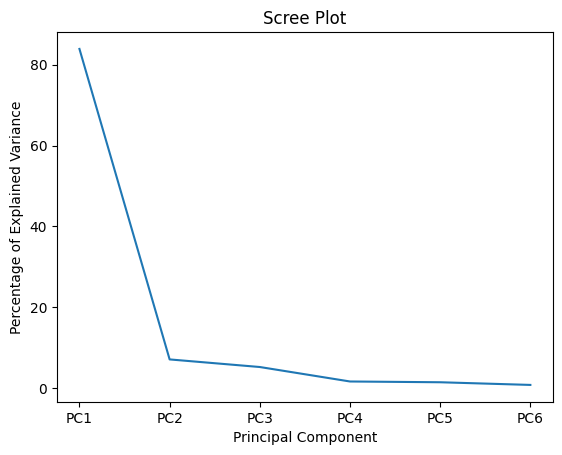

In [9]:

#scree plot

plt.plot (colunaspc, per_var)


plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


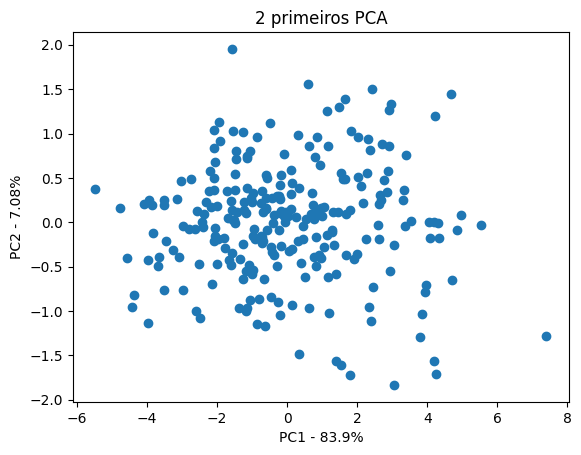

In [10]:


#dispersão dos dois primeiros PCAs

plt.scatter(pca_data_.PC1, pca_data_.PC2)
plt.title('2 primeiros PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#usar somente se quiser ver os pontos nos PCAs.

#for sample in pca_data_.index:
 #   plt.annotate(sample, (pca_data_.PC1.loc[sample], pca_data_.PC2.loc[sample]))
 
plt.show()

In [11]:
#autovetores (pesos dos componentes)
print(pca.components_)

[[ 0.43331363  0.40929599  0.40991041  0.42384965  0.39891908  0.37135507]
 [-0.03713399 -0.42331501 -0.48654767 -0.0223598   0.38527631  0.65860385]
 [-0.03099933  0.36671775  0.07662847 -0.39373054 -0.57316037  0.61249381]
 [ 0.56295239  0.04784287 -0.56135045  0.40644312 -0.44040963 -0.08077556]
 [ 0.10170378  0.60443483 -0.46315837 -0.44777449  0.4099979  -0.2029752 ]
 [ 0.69472322 -0.38880443  0.24442358 -0.54692758  0.04305816 -0.07391949]]


In [12]:
pwd()

'C:\\Users\\sbrcmi'